In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("E:\\azade\dataroadmap\so2\continent wise-so2-emissions.csv")


In [61]:
df.head(10)

,Continent,Year,SO2_Emissions (million tonnes per year)
0,Africa,1850,0.000
1,Africa,1860,0.000
2,Africa,1870,0.000
3,Africa,1880,0.059
4,Africa,1890,0.065
5,Africa,1900,0.071
6,Africa,1910,0.146
7,Africa,1920,0.372
8,Africa,1930,0.410
9,Africa,1940,0.560


In [62]:
df.info()
df.columns
df['Continent']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                102 non-null    object 
 1   Year                                     102 non-null    int64  
 2   SO2_Emissions (million tonnes per year)  102 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


0      Africa
1      Africa
2      Africa
3      Africa
4      Africa
        ...  
97      World
98      World
99      World
100     World
101     World
Name: Continent, Length: 102, dtype: object

In [63]:
continent_name= df['Continent'][0]
cumltv=0
j=0
cumltv_so2= []
continent= []
dataRange=len(df)

for i in range(dataRange):
  if continent_name == df['Continent'][i]:
    cumltv+= df['SO2_Emissions (million tonnes per year)'][i]
  else:
     continent.insert(j,continent_name)
     cumltv_so2.insert(j,cumltv)
     cumltv=0;
     j+=1
     continent_name = df['Continent'][i]
     cumltv+= df['SO2_Emissions (million tonnes per year)'][i]

continent.insert(j,continent_name)
cumltv_so2.insert(j,cumltv)
cumltv=0;
print (cumltv_so2)
print (continent)

[31.232999999999997, 240.278, 393.518, 289.33200000000005, 50.287000000000006, 1004.648]
['Africa', 'Asia', 'Europe', 'North America', 'South America', 'World']


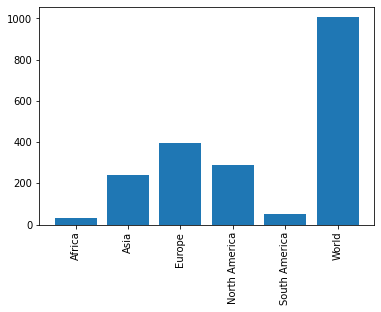

In [64]:
import matplotlib.pyplot as plt
#plt.plot(continent, cumltv_so2)
plt.bar(continent, cumltv_so2)
plt.xticks(rotation=90)
plt.show()

In [65]:

so2_simple={'Continent':continent,'cumltv_so2':cumltv_so2}

simple_so2_df=pd.DataFrame(so2_simple)

simple_so2_df

,Continent,cumltv_so2
0,Africa,31.233
1,Asia,240.278
2,Europe,393.518
3,North America,289.332
4,South America,50.287
5,World,1004.648


In [66]:
simple_so2_df.describe()

,cumltv_so2
count,6.000000
mean,334.882667
std,356.720177
min,31.233000
25%,97.784750
50%,264.805000
75%,367.471500
max,1004.648000


In [67]:
print(simple_so2_df.min())

Continent     Africa
cumltv_so2    31.233
dtype: object


In [68]:
simple_so2_df.drop(simple_so2_df[simple_so2_df.Continent == 'World'].index, inplace=True)
simple_so2_df

,Continent,cumltv_so2
0,Africa,31.233
1,Asia,240.278
2,Europe,393.518
3,North America,289.332
4,South America,50.287


In [69]:
so2_cumltv={'Year':df.Year[0:17]}

df_cumltv=pd.DataFrame(so2_cumltv)

df_cumltv

continent_name= df['Continent'][0]
cumltv =0
j=0
k=0
cumltv_so2 = [0] * 17
dataRange=len(df)

for i in range(dataRange):
  if continent_name == df['Continent'][i]:
    cumltv+= df['SO2_Emissions (million tonnes per year)'][i]
    cumltv_so2[j] = cumltv
    j+=1
  else:
     j=0
     k+=1
     df_cumltv.insert(k, continent_name, cumltv_so2, True)
     cumltv=0
     continent_name = df['Continent'][i]
     cumltv+= df['SO2_Emissions (million tonnes per year)'][i]
     cumltv_so2[j] = cumltv
     j+=1
    
k+=1
df_cumltv.insert(k, continent_name, cumltv_so2, True) 
    
df_cumltv

,Year,Africa,Asia,Europe,North America,South America,World
0,1850,0.000,0.000,1.362,0.372,0.032,1.766
1,1860,0.000,0.000,3.353,1.192,0.110,4.655
2,1870,0.000,0.000,6.391,2.773,0.194,9.358
3,1880,0.059,0.000,11.169,5.845,0.292,17.365
4,1890,0.124,0.000,17.580,11.773,0.408,29.885
5,1900,0.195,0.476,26.643,22.113,0.548,49.975
6,1910,0.341,1.964,38.283,40.353,1.046,81.987
7,1920,0.713,3.565,48.870,62.793,1.732,117.673
8,1930,1.123,5.927,63.604,85.137,2.794,158.585
9,1940,1.683,12.385,82.708,108.303,4.378,209.457


In [70]:
so2_df={'Year':df.Year[0:17]}

df_=pd.DataFrame(so2_df)

df_

continent_name= df['Continent'][0]
j=0
k=0
d_so2 = [0] * 17
dataRange=len(df)

for i in range(dataRange):
  if continent_name == df['Continent'][i]:
    d_so2[j] = df['SO2_Emissions (million tonnes per year)'][i]
    j+=1
  else:
     j=0
     k+=1
     df_.insert(k, continent_name, d_so2, True)
     continent_name = df['Continent'][i] 
     d_so2[j] = df['SO2_Emissions (million tonnes per year)'][i]
     j+=1
    
k+=1
df_.insert(k, continent_name, d_so2, True) 
    
df_

,Year,Africa,Asia,Europe,North America,South America,World
0,1850,0.000,0.000,1.362,0.372,0.032,1.766
1,1860,0.000,0.000,1.991,0.820,0.078,2.889
2,1870,0.000,0.000,3.038,1.581,0.084,4.703
3,1880,0.059,0.000,4.778,3.072,0.098,8.007
4,1890,0.065,0.000,6.411,5.928,0.116,12.520
5,1900,0.071,0.476,9.063,10.340,0.140,20.090
6,1910,0.146,1.488,11.640,18.240,0.498,32.012
7,1920,0.372,1.601,10.587,22.440,0.686,35.686
8,1930,0.410,2.362,14.734,22.344,1.062,40.912
9,1940,0.560,6.458,19.104,23.166,1.584,50.872


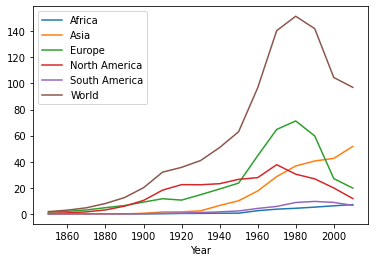

In [86]:
plt_data = df_
plt_data = plt_data.set_index('Year')
lines = plt_data.plot.line()

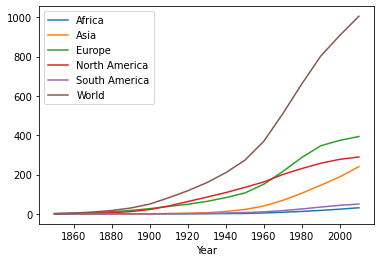

In [88]:
plt_data_cumltv = df_cumltv
plt_data_cumltv = plt_data_cumltv.set_index('Year')
lines = plt_data_cumltv.plot.line()